In [15]:
from efficient_portfolio.efficient_portfolio import plot_returns, get_actual_returns, load_data, get_max_sharp_allocation


prices, market_cap = load_data()


biggest = list(market_cap.iloc[-1].dropna().sort_values(ascending=False)[:40].index)


for coin in prices.columns: 
    if coin not in biggest:
        del prices[coin]
    
    


In [16]:
prices

,Aave,Algorand,Avalanche,Binance Coin,BitTorrent,Bitcoin,Bitcoin Cash,Bitcoin SV,Cardano,Chainlink,...,Solana,Stellar,THETA,THORChain,TRON,Terra,Tezos,Uniswap,VeChain,XRP
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,134.210022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-05,NaN,NaN,NaN,NaN,NaN,115.910004,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-12,NaN,NaN,NaN,NaN,NaN,115.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-19,NaN,NaN,NaN,NaN,NaN,121.990028,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-26,NaN,NaN,NaN,NaN,NaN,133.479996,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-02,NaN,NaN,NaN,NaN,NaN,122.292168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-09,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-16,NaN,NaN,NaN,NaN,NaN,99.510017,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06-23,NaN,NaN,NaN,NaN,NaN,107.600021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt

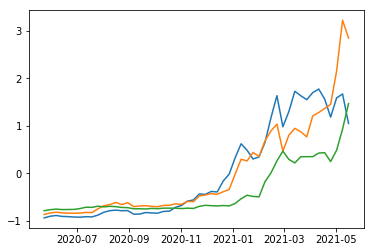

In [9]:

btc = prices["Bitcoin"][-52:]
eth = prices["Ethereum"][-52:]
ada = prices["Cardano"][-52:]

plt.plot((btc - btc.mean()) / btc.std())
plt.plot((eth - eth.mean()) / eth.std() )
plt.plot((ada-ada.mean()/ada.std()))
plt.show()

In [40]:
pct_changes = prices[-52:].dropna(axis=1)


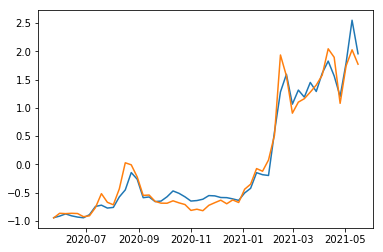

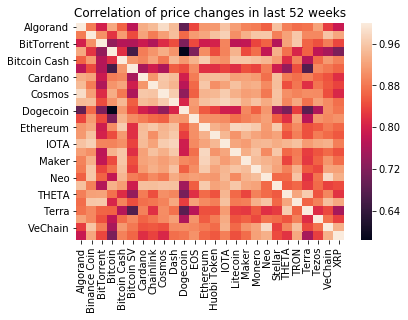

In [69]:
correlation = pct_changes.corr()
import seaborn as sns
sns.heatmap(correlation)
plt.title("Correlation of price changes in last 52 weeks")
plt.savefig("corr.jpg")
plt.show()

In [68]:
correlation.shape

(26, 26)

In [50]:
pairs = {}
for c in correlation.index:
    for d in correlation.columns:
        if c != d:
            corr = correlation.loc[c][d]
            if (d,c) not in pairs.keys():
                pairs[(c,d)] = corr

('Algorand', 'Cosmos') 0.9833721880974374


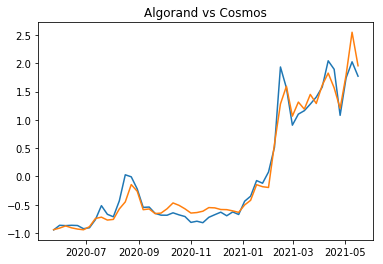

('Neo', 'VeChain') 0.9817768890403972


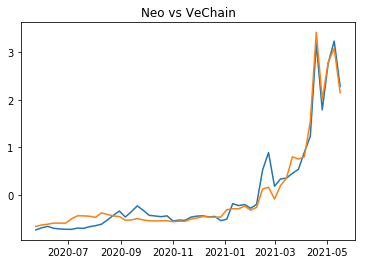

('Ethereum', 'Litecoin') 0.9774084802016446


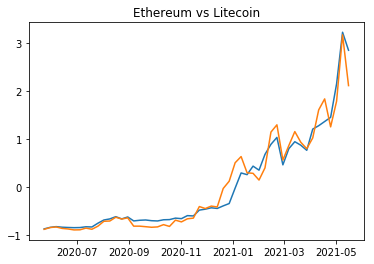

('Dash', 'IOTA') 0.9744734270870491


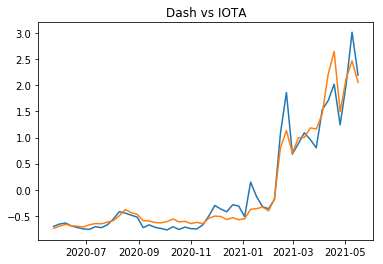

('Ethereum', 'Maker') 0.9736746873175748


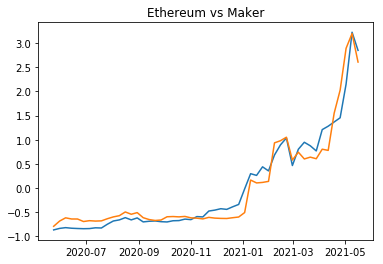

('Binance Coin', 'IOTA') 0.9702364422069452


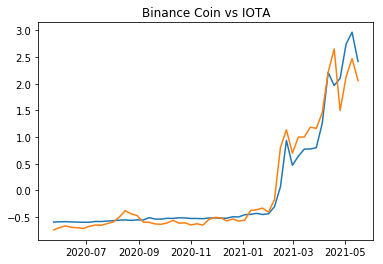

('Bitcoin Cash', 'Ethereum') 0.9654329281648931


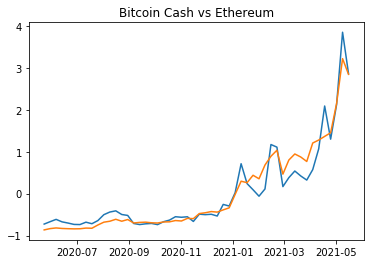

('THETA', 'Terra') 0.9647714691571406


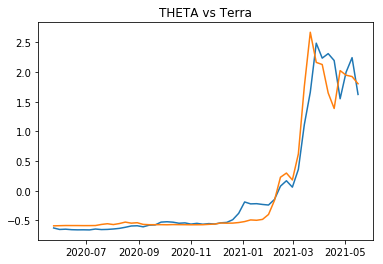

('Cosmos', 'Dash') 0.9645861463281153


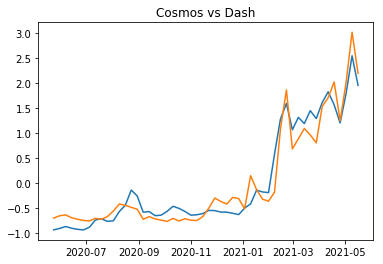

('Cosmos', 'IOTA') 0.9645342686656158


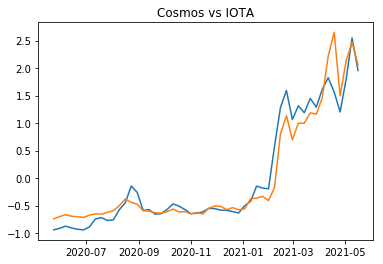

In [81]:
sorted_pairs = sorted(pairs.items(), key= lambda x: x[1], reverse=True )

for pair,corr in sorted_pairs[:10]:
    print(pair,corr)
    for x in pair:
        val = prices.iloc[-52:][x]
        val = (val-val.mean()) / val.std()
        plt.plot(val)
    plt.title(f"{pair[0]} vs {pair[1]}")
    plt.savefig(f"{pair[0]}_{pair[1]}.jpg")

    plt.show()


In [ ]:
sorted_